Ejercicio de Regresión Lineal: Duración de la Batería vs Precio del Smartphone
Supongamos que tienes datos ficticios que relacionan el precio de un smartphone (en dólares) con la duración de la batería (en horas). Queremos aplicar regresión lineal para predecir la duración de la batería basándonos en el precio del smartphone.

In [21]:
import numpy as np
import pandas as pd

# Generar datos ficticios
np.random.seed(42)
precios = np.random.uniform(200, 1000, 50)  # Precios entre 200 y 1000 dólares
ruido = np.random.normal(0, 2, 50)  # Ruido normal para simular variabilidad
duracion_bateria = 0.05 * precios + 5 + ruido  # Relación lineal con ruido

# Crear DataFrame
data = pd.DataFrame({'precio': precios, 'duracion_bateria': duracion_bateria})

# Mostrar los primeros 10 registros del DataFrame
print(data.head(10))


       precio  duracion_bateria
0  499.632095         31.458538
1  960.571445         53.371309
2  785.595153         44.048461
3  678.926787         38.344132
4  324.814912         18.283702
5  324.795616         19.800092
6  246.466890         16.402067
7  892.940917         51.761290
8  680.892009         39.731837
9  766.458062         39.796823


In [23]:
import matplotlib.pyplot as mp
%matplotlib  inline

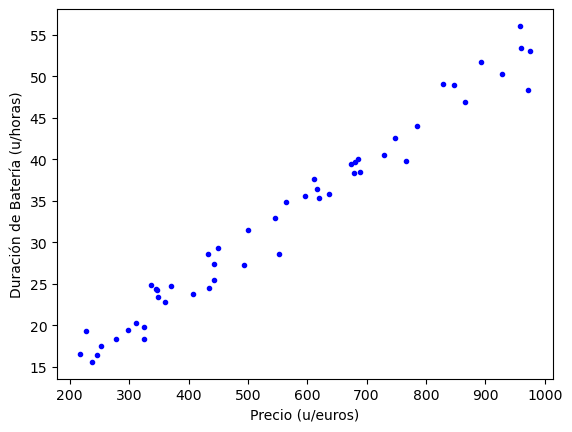

In [25]:
mp.plot(precios,duracion_bateria,"b.")
mp.xlabel("Precio (u/euros)")
mp.ylabel("Duración de Batería (u/horas)")
mp.show()

Construimos el modelo

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data['precio'].values.reshape(-1,1),data['duracion_bateria'].values)

LinearRegression()

In [37]:
lin_reg.intercept_

5.3050955470112235

In [39]:
lin_reg.coef_

array([0.04944142])

EXTRACCIÓN DE MÁXIMOS Y MÍNIMOS

In [43]:
X_min_max = np.array([[data["precio"].min()],[data["precio"].max()]])

X_min_max

array([[216.46759544],
       [975.92788173]])

In [47]:
y_train_pred = lin_reg.predict(X_min_max)

y_train_pred

array([16.00755977, 53.55635097])

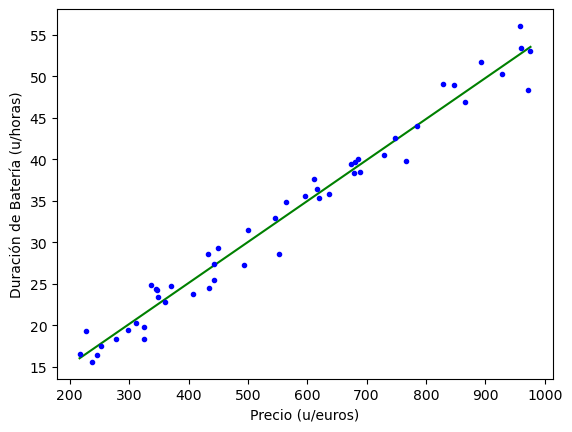

In [50]:
mp.plot(X_min_max, y_train_pred,"g-")
mp.plot(precios,duracion_bateria,"b.")
mp.xlabel("Precio (u/euros)")
mp.ylabel("Duración de Batería (u/horas)")
mp.show()

PREDICCIÓN DE NUEVOS EJEMPLOS

In [68]:
x_new = np.array([[800]]) # Móvil de 220 euros

nueva_duracion_bateria = lin_reg.predict(x_new)
nueva_duracion_bateria

array([44.85822755])

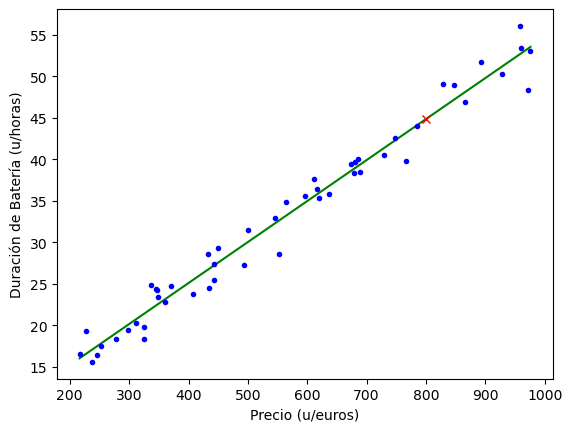

In [70]:
mp.plot(X_min_max, y_train_pred,"g-")
mp.plot(data["precio"],data["duracion_bateria"],"b.")
mp.plot(x_new,nueva_duracion_bateria,"rx")
mp.xlabel("Precio (u/euros)")
mp.ylabel("Duración de Batería (u/horas)")
mp.show()